In [3]:
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint
import importlib
from os.path import join,expanduser
user_home_dir = expanduser('~')
import ecco_v4_py as ecco
import os

In [21]:
ECCO_dir = os.path.expanduser('/Users/boerzhang/Downloads/ECCO_V4r4_PODAAC')
ecco_grid = xr.open_dataset(glob.glob(join(ECCO_dir,'*GEOMETRY*','*.nc'))[0])
## Load the model grid
wvel = xr.open_dataset(glob.glob(join(ECCO_dir,'*VEL_LLC0090GRID*','average_wvel.nc'))[0])
#Boer: not sure why 'Z' is not automatically added as a coordinate
wvel = wvel.set_coords('Z')
ecco_ds = xr.merge((ecco_grid , wvel)).load()

In [24]:
ecco_ds.WVEL.isel(time=0)

<xarray.DataArray 'WVEL' (k_l: 50, tile: 13, j: 90, i: 90)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [-2.78017307e-08, -2.90201250e-08, -3.02463867e-08, ...,
          -2.16141540e-08, -2.08455742e-08, -2.07033430e-08],
         [-2.61642299e-08, -2.72937939e-08, -2.84686745e-08, ...,
          -2.15362341e-08, -2.07833679e-08, -2.03731432e-08],
         [-2.23791563e-08, -2.39449225e-08, -2.44838603e-08, ...,
          -2.08092370e-08, -1.94039966e-08, -1.86726030e-08]],

        [[-1.80428685e-08, -1.91697325e-08, -1.82254638e-08, ...,
          -1.91117309e-08, -1.80104287e-08, -1.72031367e-08],
         [-1.48491797e-08, -1.53013211e-08, -1.47006336e-08, ...,
          -1.87649700e-08, -1.78093753e-08, -1.68862009e-08],
         [-1.33850806e-08, -1.34876261e-08, -1.32519791e-08, ...,
          -1.90600531e-08, -1.80930204e-08, -1.71410424e-08],
...
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]]]],
      dtype=float32)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 -111.6 -111.3 -110.9 ... -99.42 -105.6 -111.9
    YC       (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    Zl       (k_l) float32 0.0 -10.0 -20.0 ... -4.834e+03 -5.244e+03 -5.678e+03
    time     datetime64[ns] 2010-01-16T12:00:00
Attributes:
    long_name:              Vertical velocity
    units:                  m s-1
    coverage_content_type:  modelResult
    direction:              >0 decreases volume
    standard_name:          upward_sea_water_velocity
    comment:                Vertical velocity in the +z direction at the top ...
    valid_min:              -0.0012012796
    valid_max:              0.00057065237

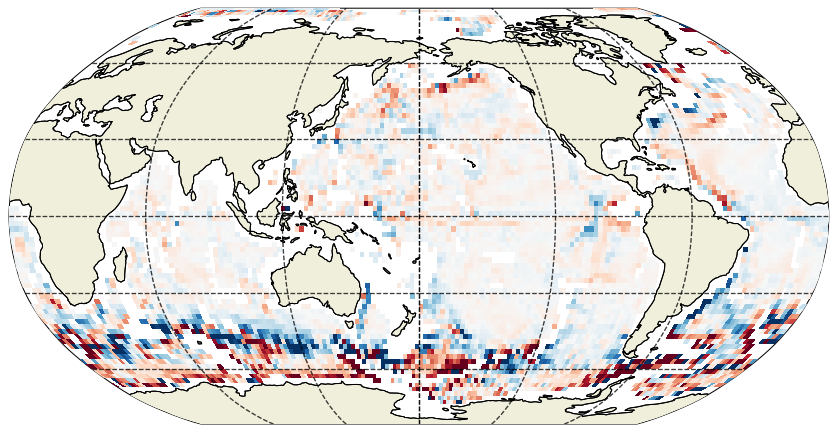

In [102]:
plt.figure(figsize=(12,6), dpi= 90)
ecco.plot_proj_to_latlon_grid(ecco_ds.XC, \
                              ecco_ds.YC, \
                              ecco_ds.WVEL.isel(time=0).isel(k_l=41), \
                              plot_type = 'pcolormesh', \
                              dx=2,\
                              dy=2, \
                              cmin=-5e-6,\
                              cmax=5e-6,\
                              user_lon_0=180,\
                              mapping_method='bin_average',\
                              radius_of_influence = 500000,\
                              projection_type = 'robin',\
                              less_output = True);
#plt.colorbar()


In [106]:
new_grid_delta_lat = 2
new_grid_delta_lon = 2

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180
new_grid_lon_centers, new_grid_lat_centers,\
new_grid_lon_edges, new_grid_lat_edges,\
wvel_2deg =\
        ecco.resample_to_latlon(ecco_ds.XC, \
                                ecco_ds.YC, \
                                ecco_ds.WVEL.isel(time=0).isel(k_l=42), \
                                new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,\
                                new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,\
                                fill_value = np.NaN, \
                                mapping_method='bin_average',\
                                radius_of_influence = 1000000)

In [107]:
wvel_xr = xr.DataArray(wvel_2deg,  name = 'WVEL', 
                      dims = ['latitude','longitude'], 
                      coords = {'latitude': new_grid_lat_centers[:,0],
                                'longitude': new_grid_lon_centers[0,:]})

In [108]:
output_path = join(user_home_dir,'Downloads','wvel_2deg_bin_average_kl42_1000km.nc')
wvel_xr.to_netcdf(output_path)